## **STEP 1: INSTALL NECESSARY PACKAGES**

In [ ]:
!pip install scikit-learn==1.0.2

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [ ]:
# also set a random state
rs = 123

## **STEP 2: GENERATE USER PROFILES USING COURSE GENRES & RATINGS**

In [ ]:
course_genres = ['Python', 'Database', 'MachineLearning']
courses = [['Machine Learning with Python', 1, 0, 1], ["SQL with Python", 1, 1, 0]]
courses_df = pd.DataFrame(courses, columns = ['Title'] + course_genres)
courses_df

,Title,Python,Database,MachineLearning
0,Machine Learning with Python,1,0,1
1,SQL with Python,1,1,0


In [ ]:
users = [['user0', 'Machine Learning with Python', 3], ['user1', 'SQL with Python', 2]]
users_df = pd.DataFrame(users, columns = ['User', 'Title', 'Rating'])
users_df

,User,Title,Rating
0,user0,Machine Learning with Python,3
1,user1,SQL with Python,2


In [ ]:
# User 0 rated course 0 as 3 and course 1 as 0/NA (unknown or not interested)
u0 = np.array([[3, 0]])

In [ ]:
# The course genre's matrix
C = courses_df[['Python', 'Database', 'MachineLearning']].to_numpy()

In [ ]:
print(f"User profile vector shape {u0.shape} and course genre matrix shape {C.shape}")

User profile vector shape (1, 2) and course genre matrix shape (2, 3)


In [ ]:
u0_weights = np.matmul(u0, C)
u0_weights

array([[3, 0, 3]])

In [ ]:
course_genres

['Python', 'Database', 'MachineLearning']

In [ ]:
# User 1 rated course 0 as 0 (unknown or not interested) and course 1 as 2
u1 = np.array([[0, 2]])

In [ ]:
u1_weights = np.matmul(u1, C)
u1_weights

array([[2, 2, 0]])

In [ ]:
weights = np.concatenate((u0_weights.reshape(1, 3), u1_weights.reshape(1, 3)), axis=0)
profiles_df = pd.DataFrame(weights, columns=['Python', 'Database', 'MachineLearning'])
profiles_df.insert(0, 'user', ['user0', 'user1'])

In [ ]:
profiles_df

,user,Python,Database,MachineLearning
0,user0,3,0,3
1,user1,2,2,0


## **STEP 3: GENERATE RECOMMENDATION SCORES FOR NEW COURSES**


In [ ]:
new_courses = [['Python 101', 1, 0, 0], ["Database 101", 0, 1, 0], ["Machine Learning with R", 0, 0, 1]]
new_courses_df = pd.DataFrame(new_courses, columns = ['Title', 'Python', 'Database', 'MachineLearning'])
new_courses_df

,Title,Python,Database,MachineLearning
0,Python 101,1,0,0
1,Database 101,0,1,0
2,Machine Learning with R,0,0,1


In [ ]:
profiles_df

,user,Python,Database,MachineLearning
0,user0,3,0,3
1,user1,2,2,0


In [ ]:
# Drop the title column
new_courses_df = new_courses_df.loc[:, new_courses_df.columns != 'Title']
course_matrix = new_courses_df.values
course_matrix

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
# course matrix shape
course_matrix.shape

(3, 3)

In [ ]:
# Drop the user column
profiles_df = profiles_df.loc[:, profiles_df.columns != 'user']
profile_matrix = profiles_df.values
profile_matrix

array([[3, 0, 3],
       [2, 2, 0]])

In [ ]:
profile_matrix.shape

(2, 3)

In [ ]:
scores = np.matmul(course_matrix, profile_matrix.T)
scores

array([[3, 2],
       [0, 2],
       [3, 0]])

In [ ]:
scores_df = pd.DataFrame(scores, columns=['User0', 'User1'])
scores_df.index = ['Python 101', 'Database 101', 'Machine Learning with R']

In [ ]:
# recommendation score dataframe
scores_df

,User0,User1
Python 101,3,2
Database 101,0,2
Machine Learning with R,3,0


## **STEP 4: GENERATE COURSE RECOMMENDATIONS BASED ON USER PROFILE & COURSE GENRE VECTORS**


In [ ]:
course_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/course_genre.csv"
course_genres_df = pd.read_csv(course_genre_url)

In [ ]:
course_genres_df.head()

,COURSE_ID,TITLE,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,ML0201EN,robots are coming build iot apps with watson ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,ML0122EN,accelerating deep learning with gpu,0,1,0,0,0,1,0,1,0,0,0,0,0,0
2,GPXX0ZG0EN,consuming restful services using the reactive ...,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,RP0105EN,analyzing big data in r using apache spark,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,GPXX0Z2PEN,containerizing packaging and running a sprin...,0,0,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
profile_genre_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/user_profile.csv"
profile_df = pd.read_csv(profile_genre_url)

In [ ]:
profile_df.head()

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
0,2,52.0,14.0,6.0,43.0,3.0,33.0,0.0,29.0,41.0,2.0,18.0,34.0,9.0,6.0
1,4,40.0,2.0,4.0,28.0,0.0,14.0,0.0,20.0,24.0,0.0,6.0,6.0,0.0,2.0
2,5,24.0,8.0,18.0,24.0,0.0,30.0,0.0,22.0,14.0,2.0,14.0,26.0,4.0,6.0
3,7,2.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [ ]:
profile_df[profile_df['user'] == 8]

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
4,8,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,0.0,2.0,0.0,0.0,0.0


In [ ]:
test_users_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML321EN-SkillsNetwork/labs/datasets/rs_content_test.csv"
test_users_df = pd.read_csv(test_users_url)

In [ ]:
test_users = test_users_df.groupby(['user']).max().reset_index(drop=False)
test_user_ids = test_users['user'].to_list()
print(f"Total numbers of test users {len(test_user_ids)}")

Total numbers of test users 1000


In [ ]:
test_user_profile = profile_df[profile_df['user'] == 1078030]
test_user_profile

,user,Database,Python,CloudComputing,DataAnalysis,Containers,MachineLearning,ComputerVision,DataScience,BigData,Chatbot,R,BackendDev,FrontendDev,Blockchain
18204,1078030,0.0,12.0,0.0,9.0,0.0,12.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Now let's get the test user vector by excluding the `user` column
test_user_vector = test_user_profile.iloc[0, 1:].values
test_user_vector

array([ 0., 12.,  0.,  9.,  0., 12.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
        0.])

In [ ]:
enrolled_courses = test_users_df[test_users_df['user'] == 1078030]['item'].to_list()
enrolled_courses = set(enrolled_courses)

In [ ]:
enrolled_courses

{'DA0101EN',
 'DV0101EN',
 'ML0101ENv3',
 'ML0115EN',
 'ML0120ENv2',
 'ML0122ENv1',
 'PY0101EN',
 'ST0101EN'}

In [ ]:
all_courses = set(course_genres_df['COURSE_ID'].values)
all_courses

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0101EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01

In [ ]:
unknown_courses = all_courses.difference(enrolled_courses)
unknown_courses

{'AI0111EN',
 'BC0101EN',
 'BC0201EN',
 'BC0202EN',
 'BD0101EN',
 'BD0111EN',
 'BD0115EN',
 'BD0121EN',
 'BD0123EN',
 'BD0131EN',
 'BD0133EN',
 'BD0135EN',
 'BD0137EN',
 'BD0141EN',
 'BD0143EN',
 'BD0145EN',
 'BD0151EN',
 'BD0153EN',
 'BD0211EN',
 'BD0212EN',
 'BD0221EN',
 'BD0223EN',
 'BENTEST4',
 'CB0101EN',
 'CB0103EN',
 'CB0105ENv1',
 'CB0201EN',
 'CC0101EN',
 'CC0103EN',
 'CC0120EN',
 'CC0121EN',
 'CC0150EN',
 'CC0201EN',
 'CC0210EN',
 'CC0250EN',
 'CC0271EN',
 'CL0101EN',
 'CNSC02EN',
 'CO0101EN',
 'CO0193EN',
 'CO0201EN',
 'CO0301EN',
 'CO0302EN',
 'CO0401EN',
 'COM001EN',
 'CP0101EN',
 'DA0151EN',
 'DA0201EN',
 'DAI101EN',
 'DB0101EN',
 'DB0111EN',
 'DB0113EN',
 'DB0115EN',
 'DB0151EN',
 'DE0205EN',
 'DJ0101EN',
 'DP0101EN',
 'DS0101EN',
 'DS0103EN',
 'DS0105EN',
 'DS0107',
 'DS0110EN',
 'DS0132EN',
 'DS0201EN',
 'DS0301EN',
 'DS0321EN',
 'DV0151EN',
 'DW0101EN',
 'DX0106EN',
 'DX0107EN',
 'DX0108EN',
 'EE0101EN',
 'GPXX01AVEN',
 'GPXX01DCEN',
 'GPXX01RYEN',
 'GPXX03HFEN',
 'GP

In [ ]:
unknown_course_genres = course_genres_df[course_genres_df['COURSE_ID'].isin(unknown_courses)]
# Now let's get the course matrix by excluding `COURSE_ID` and `TITLE` columns:
course_matrix = unknown_course_genres.iloc[:, 2:].values
course_matrix

array([[0, 0, 0, ..., 1, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 0]])

In [ ]:
score = np.dot(course_matrix[1], test_user_vector)
score

30.0

In [ ]:
# We first reload all datasets again, and create an empty dictionary to store the results
test_users_df = pd.read_csv(test_users_url)
profile_df = pd.read_csv(profile_genre_url)
course_genres_df = pd.read_csv(course_genre_url)
res_dict = {}

In [ ]:
# Only keep the score larger than the recommendation threshold
# The threshold can be fine-tuned to adjust the size of generated recommendations
score_threshold = 10.0

In [ ]:
# Assuming that the last column in the user profile DataFrame might be extra (like an ID or timestamp)
if 'non_feature_column' in profile_df.columns:
    profile_df.drop(columns=['non_feature_column'], inplace=True)

# Similarly, ensure course feature vectors are correctly aligned
if 'non_feature_column' in course_genres_df.columns:
    course_genres_df.drop(columns=['non_feature_column'], inplace=True)


In [ ]:
print("User features:")
print(profile_df.columns)
print("Course features:")
print(course_genres_df.columns)

User features:
Index(['user', 'Database', 'Python', 'CloudComputing', 'DataAnalysis',
       'Containers', 'MachineLearning', 'ComputerVision', 'DataScience',
       'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'],
      dtype='object')
Course features:
Index(['COURSE_ID', 'TITLE', 'Database', 'Python', 'CloudComputing',
       'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision',
       'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev',
       'Blockchain'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np

# Assuming all necessary dataframes and variables like profile_df, test_users_df, course_genres_df, all_courses, and score_threshold are already defined.

def generate_recommendation_scores():
    users = []
    courses = []
    scores = []
    for user_id in test_user_ids:
        test_user_profile = profile_df[profile_df['user'] == user_id]
        if test_user_profile.empty:
            continue  # Skip if no profile found

        # Extract user vector; skip the 'user' column which is the first column
        test_user_vector = test_user_profile.iloc[0, 1:].values

        enrolled_courses = test_users_df[test_users_df['user'] == user_id]['item'].to_list()
        unknown_courses = all_courses.difference(enrolled_courses)
        unknown_course_df = course_genres_df[course_genres_df['COURSE_ID'].isin(unknown_courses)]

        # Extract course vectors; skip 'COURSE_ID' and 'TITLE' which are the first two columns
        course_vectors = unknown_course_df.iloc[:, 2:].values

        if course_vectors.shape[1] != len(test_user_vector):
            print(f"Dimension mismatch for user {user_id}: {course_vectors.shape[1]} vs {len(test_user_vector)}")
            continue

        # Calculate recommendation scores using a dot product
        recommendation_scores = np.dot(course_vectors, test_user_vector)

        for i, score in enumerate(recommendation_scores):
            if score >= score_threshold:
                users.append(user_id)
                courses.append(unknown_course_df['COURSE_ID'].values[i])
                scores.append(score)

    return users, courses, scores

# Setting a score threshold (assuming it's already been defined elsewhere or set here)
score_threshold = 10.0  # Adjust this as needed

# Execute the function to get recommendation scores
users, courses, scores = generate_recommendation_scores()

# Create a DataFrame from the results
res_dict = {
    'USER': users,
    'COURSE_ID': courses,
    'SCORE': scores
}
res_df = pd.DataFrame(res_dict)

# Printing initial and final data entries for verification
print("First 5 entries in the recommendations DataFrame:")
print(res_df.head())

print("\nLast 5 entries in the recommendations DataFrame:")
print(res_df.tail())


First 5 entries in the recommendations DataFrame:
    USER   COURSE_ID  SCORE
0  37465    RP0105EN   27.0
1  37465  GPXX06RFEN   12.0
2  37465    CC0271EN   15.0
3  37465    BD0145EN   24.0
4  37465    DE0205EN   15.0

Last 5 entries in the recommendations DataFrame:
          USER   COURSE_ID  SCORE
53406  2087663  excourse88   15.0
53407  2087663  excourse89   15.0
53408  2087663  excourse90   15.0
53409  2087663  excourse92   15.0
53410  2087663  excourse93   15.0


In [ ]:
# Check if the necessary DataFrames and sets are correctly initialized and populated
print("Profile DataFrame head and info:")
print(profile_df.head())
print(profile_df.info())

print("\nTest Users DataFrame head and info:")
print(test_users_df.head())
print(test_users_df.info())

print("\nCourse Genres DataFrame head and info:")
print(course_genres_df.head())
print(course_genres_df.info())

print("\nAll courses set:")
print(all_courses)

# Check if user IDs and course IDs exist in their respective DataFrames
print("\nSample check for existence of user ID 1078030 in profile_df:")
print(1078030 in profile_df['user'].values)

# Check the shape and sample of course_matrix
print("\nCourse matrix shape and sample row:")
print(course_matrix.shape)
print(course_matrix[0])


Profile DataFrame head and info:
   user  Database  Python  CloudComputing  DataAnalysis  Containers  \
0     2      52.0    14.0             6.0          43.0         3.0   
1     4      40.0     2.0             4.0          28.0         0.0   
2     5      24.0     8.0            18.0          24.0         0.0   
3     7       2.0     0.0             0.0           2.0         0.0   
4     8       6.0     0.0             0.0           4.0         0.0   

   MachineLearning  ComputerVision  DataScience  BigData  Chatbot     R  \
0             33.0             0.0         29.0     41.0      2.0  18.0   
1             14.0             0.0         20.0     24.0      0.0   6.0   
2             30.0             0.0         22.0     14.0      2.0  14.0   
3              0.0             0.0          0.0      2.0      0.0   0.0   
4              0.0             0.0          0.0      6.0      0.0   2.0   

   BackendDev  FrontendDev  Blockchain  
0        34.0          9.0         6.0  
1      

In [ ]:
users, courses, scores = generate_recommendation_scores()
print("Users:", users)
print("Courses:", courses)
print("Scores:", scores)

Users: [37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 37465, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625, 85625

Number of users with recommendations: 53411
Number of course recommendations: 53411
Number of scores: 53411
    USER   COURSE_ID  SCORE
0  37465    RP0105EN   27.0
1  37465  GPXX06RFEN   12.0
2  37465    CC0271EN   15.0
3  37465    BD0145EN   24.0
4  37465    DE0205EN   15.0
          USER   COURSE_ID  SCORE
53406  2087663  excourse88   15.0
53407  2087663  excourse89   15.0
53408  2087663  excourse90   15.0
53409  2087663  excourse92   15.0
53410  2087663  excourse93   15.0


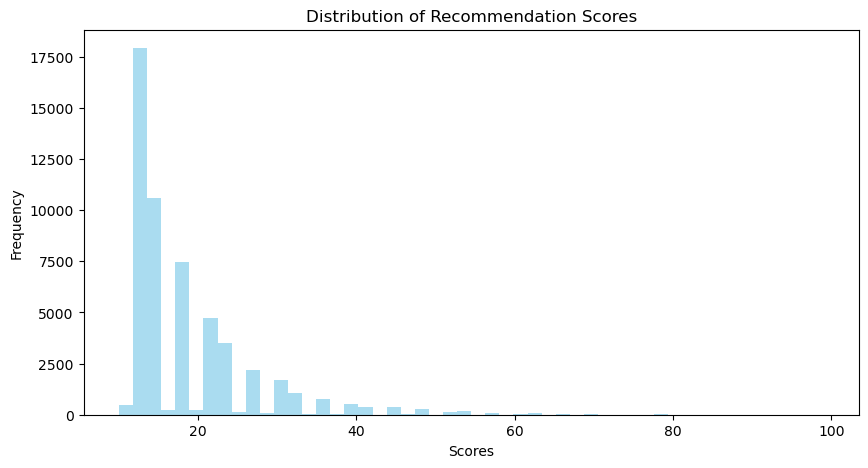

In [ ]:
users, courses, scores = generate_recommendation_scores()
print("Number of users with recommendations:", len(users))
print("Number of course recommendations:", len(courses))
print("Number of scores:", len(scores))

print(res_df.head(5))  # Print the first 10 rows of the DataFrame to inspect the recommendations
print(res_df.tail(5))  # Print the first 10 rows of the DataFrame to inspect the recommendations

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(res_df['SCORE'], bins=50, color='skyblue', alpha=0.7)
plt.title('Distribution of Recommendation Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()


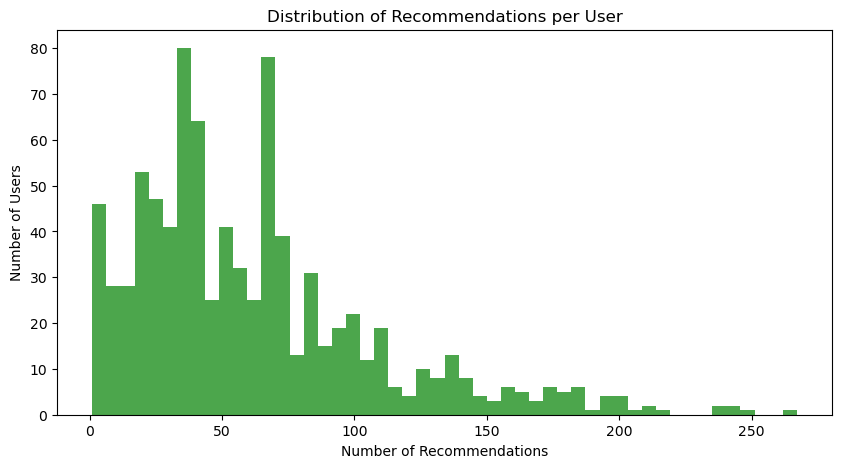

In [ ]:
import matplotlib.pyplot as plt

# Calculate the number of recommendations per user
recommendations_per_user = res_df['USER'].value_counts()

plt.figure(figsize=(10, 5))
recommendations_per_user.hist(bins=50, color='green', alpha=0.7)
plt.title('Distribution of Recommendations per User')
plt.xlabel('Number of Recommendations')
plt.ylabel('Number of Users')
plt.grid(False)  # Explicitly turn off grid lines
plt.show()


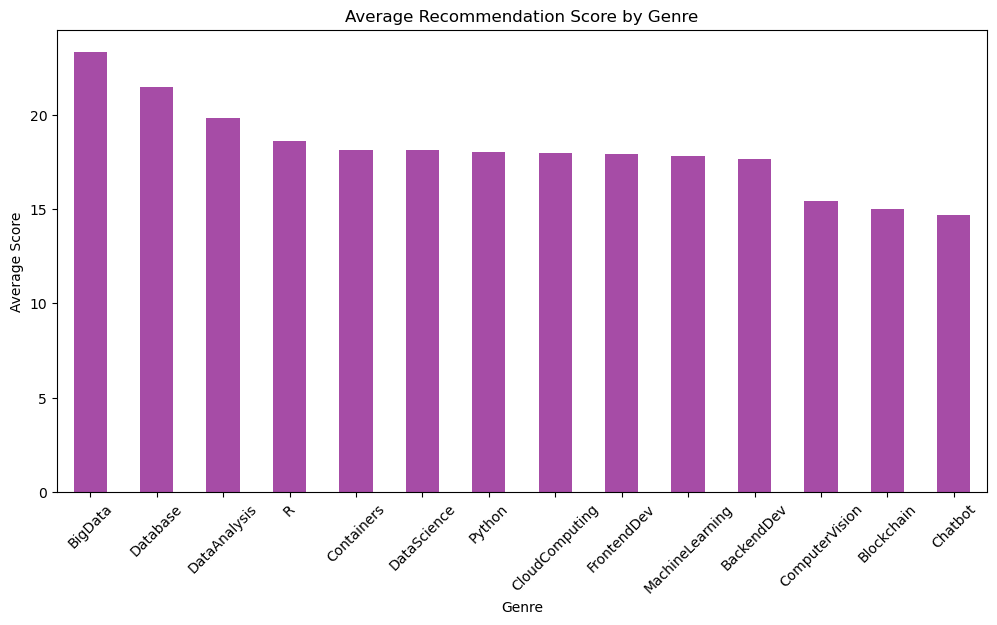

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Merge the recommendation results with the course genre data
merged_df = res_df.merge(course_genres_df, on='COURSE_ID', how='left')

# Melt the DataFrame to long format where each row is a course with a genre and its score
melted_df = pd.melt(merged_df, id_vars=['SCORE'], value_vars=['Database', 'Python', 'CloudComputing', 'DataAnalysis', 'Containers', 'MachineLearning', 'ComputerVision', 'DataScience', 'BigData', 'Chatbot', 'R', 'BackendDev', 'FrontendDev', 'Blockchain'], var_name='Genre', value_name='GenreValue')

# We only consider entries where the genre value is significant (e.g., > 0 assuming it shows relevance)
melted_df = melted_df[melted_df['GenreValue'] > 0]

# Group by 'Genre' and calculate the average score, sorting in descending order
average_scores_by_genre = melted_df.groupby('Genre')['SCORE'].mean().sort_values(ascending=False)

# Plot average score by genre
plt.figure(figsize=(12, 6))
average_scores_by_genre.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Recommendation Score by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


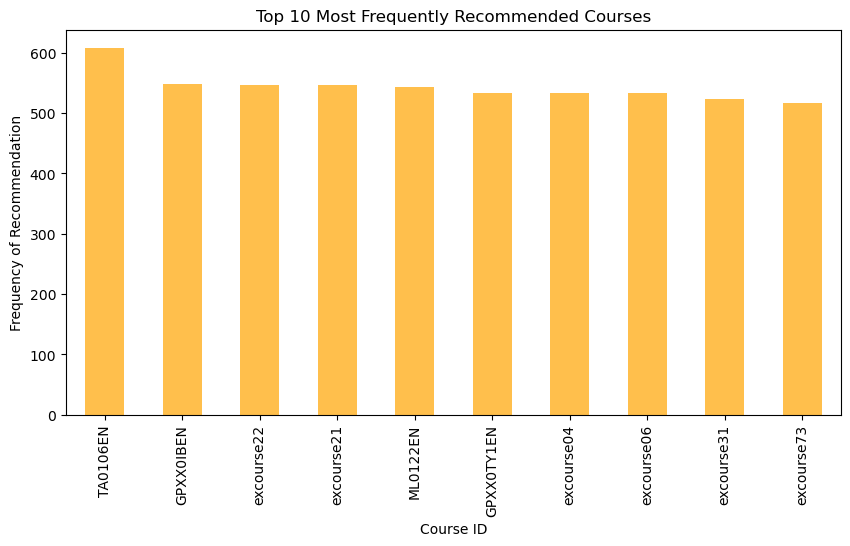

In [ ]:
import matplotlib.pyplot as plt

# Calculate the frequency of each course being recommended
course_recommendation_frequency = res_df['COURSE_ID'].value_counts()

plt.figure(figsize=(10, 5))
course_recommendation_frequency.head(10).plot(kind='bar', color='orange', alpha=0.7)  # top 10 most recommended courses
plt.title('Top 10 Most Frequently Recommended Courses')
plt.xlabel('Course ID')
plt.ylabel('Frequency of Recommendation')
plt.xticks(rotation=90)
plt.grid(False)  # Disable grid lines
plt.show()


In [ ]:
# Assuming 'course_genres_df' contains a 'TITLE' column along with 'COURSE_ID'
# Merge 'res_df' with 'course_genres_df' to include course titles
res_df = res_df.merge(course_genres_df[['COURSE_ID', 'TITLE']], on='COURSE_ID', how='left')

# Now 'res_df' contains the course titles as well as the other information
print(res_df.head(10))  # Print the first 10 rows to see some of the data

# Optional: save the updated DataFrame to a CSV file
# res_df.to_csv("profile_rs_results_with_titles.csv", index=False)


    USER   COURSE_ID  SCORE                                              TITLE
0  37465    RP0105EN   27.0         analyzing big data in r using apache spark
1  37465  GPXX06RFEN   12.0                 create your first mongodb database
2  37465    CC0271EN   15.0               cloud pak for integration essentials
3  37465    BD0145EN   24.0                              sql access for hadoop
4  37465    DE0205EN   15.0                                dataops methodology
5  37465   TMP0105EN   27.0  getting started with the data  apache spark ma...
6  37465    DB0113EN   12.0                                 db2 fundamentals i
7  37465      RP0103   12.0                             using r with databases
8  37465    RP0103EN   12.0                             using r with databases
9  37465    BD0212EN   27.0                              spark fundamentals ii


In [ ]:
# Assuming res_df and course_genres_df are already loaded and include the necessary columns

# Calculate the frequency of each course being recommended
course_recommendation_counts = res_df['COURSE_ID'].value_counts().reset_index()
course_recommendation_counts.columns = ['COURSE_ID', 'Recommendation_Count']

# Merge with course_genres_df to get the titles
course_recommendation_counts = course_recommendation_counts.merge(
    course_genres_df[['COURSE_ID', 'TITLE']],
    on='COURSE_ID',
    how='left'
)

# Sort by recommendation count to get the top 10 and select only the title and count columns for display
top_10_courses = course_recommendation_counts.head(10)[['TITLE', 'Recommendation_Count']]

# Display the top 10 courses
print("Top 10 Most Frequently Recommended Courses:")
print(top_10_courses)

Top 10 Most Frequently Recommended Courses:
                                               TITLE  Recommendation_Count
0                            text analytics at scale                   608
1  data science in insurance  basic statistical a...                   548
2             introduction to data science in python                   547
3                 applied machine learning in python                   547
4                accelerating deep learning with gpu                   544
5  performing database operations in the cloudant...                   533
6                               sql for data science                   533
7              sql for data science capstone project                   533
8  cloud computing applications  part 2  big data...                   524
9                        analyzing big data with sql                   516


In [ ]:
# Return users, courses, and scores lists for the dataframe
users, courses, scores = generate_recommendation_scores()
res_dict['USER'] = users
res_dict['COURSE_ID'] = courses
res_dict['SCORE'] = scores
res_df = pd.DataFrame(res_dict, columns=['USER', 'COURSE_ID', 'SCORE'])
# Save the dataframe
#res_df.to_csv("profile_rs_results.csv", index=False)